# Project: Wrangling and Analyze Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import tweepy
import time

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# import the twitter archive data and affect it to a datatframe
df_tarchive = pd.read_csv('twitter_archive_enhanced.csv')

In [6]:
df_tarchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#impoting the tweet image prediction automatically data using requests library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file :
    file.write(response.content)

In [4]:
# affect the data to a dataframe
df_image = pd.read_csv('image_predictions.tsv',sep="\t")

In [5]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# !!! after fetching the data I save it as tsv file so no need to use the api again

# authentification to the twitter api
#api_key = ""
#api_key_secret = ""
#access_token = ""
#access_token_secret = ""

#auth = tweepy.OAuthHandler(api_key, api_key_secret)
#auth.set_access_token(access_token, access_token_secret)

#api = tweepy.API(auth,parser=tweepy.parsers.JSONParser())


In [8]:
### !!! I save the data as tsv file so no need to use the api if you don't have the tokens
# Start a timer to watch how much time 
# the operation(getting data from api twitter api) takes
timer_start = time.time()

#get the tweets ids to use them to search for data
tweets_ids = df_tarchive['tweet_id'].values

# list to store data
tweets_data = []
# list to store tweets ids that we manage to get their data with success
tweets_success = []
# list to store tweets ids that we fail to get their data
tweets_failed = []
#count successeded tweets 
tsuccess = 0
#count failed tweets 
tfail = 0

# loop through all the tweets ids that we ave fro the archive
# and get their data from twitter api
for tweet_id in tweets_ids:
    try:
        data = api.get_status(tweet_id, tweet_mode='extended',
                              wait_on_rate_limit = True,
                             wait_on_rate_limit_notify = True)
        tweets_data.append(data)
        tweets_success.append(tweet_id)
        tsuccess+=1
    except:
        tweets_failed.append(tweet_id)
        tfail +=1

# stop the timer
timer_end = time.time()
print("time needed to get data:",(timer_end-timer_start)/60,"Min")
print("number of tweets with successfull data :", tsuccess)
print("number of tweets with failed data :", tfail)

Rate limit reached. Sleeping for: 723
Rate limit reached. Sleeping for: 728
time needed to get data: 31.941511873404185 Min
number of tweets with successfull data : 2325
number of tweets with failed data : 31


In [9]:
# let's store the data that we get to a txt file
with open('tweets_json.txt', mode = 'w') as file:
    json.dump(tweets_data, file)

In [10]:
# affect the data to a third new dataframe,
# index them by the tweets ids from the list 'tweets_success'
# and let's keep only the columns that we want to analyze
df_tweets = pd.read_json('tweets_json.txt')
df_tweets['tweet_id']= tweets_success
df_tweets = df_tweets[['tweet_id','favorite_count','retweet_count']]
df_tweets.sample(5)

,tweet_id,favorite_count,retweet_count
1235,709901256215666688,597,90
1678,680798457301471234,2543,926
118,868639477480148993,0,1711
1863,674743008475090944,1230,454
1188,714957620017307648,3719,1263


In [19]:
# Save the data to a csv file
df_tweets.to_csv('tweets_api.csv',index=False)

In [5]:
# reload the data from the csv file to avoid using the api again
df_tweets = pd.read_csv('tweets_api.csv')
df_tweets.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,32867,6876
1,892177421306343426,28394,5178
2,891815181378084864,21341,3420
3,891689557279858688,35826,7083
4,891327558926688256,34265,7589


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [23]:
df_tarchive.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1707,680801747103793152,NaN,NaN,2015-12-26 17:25:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Great picture here. Dog on the right panicked ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680801747...,10,10,None,None,None,None,None
2087,670797304698376195,NaN,NaN,2015-11-29 02:51:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Trigger. He was minding his own busine...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670797304...,11,10,Trigger,None,None,None,None
1793,677331501395156992,NaN,NaN,2015-12-17 03:36:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Humphrey. He's a Northern Polyp Viagra. O...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677331501...,9,10,Humphrey,None,None,None,None
928,754747087846248448,NaN,NaN,2016-07-17 18:38:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's pursuing a more 2D lifesty...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754747087...,12,10,Keith,None,None,None,None
199,854120357044912130,NaN,NaN,2017-04-17 23:52:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sometimes you guys remind me just how impactfu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854120357...,14,10,None,None,None,pupper,None
933,753655901052166144,NaN,NaN,2016-07-14 18:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""The dogtor is in hahahaha no but seriously I'...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/753655901...,10,10,None,None,None,None,None
2084,670807719151067136,NaN,NaN,2015-11-29 03:33:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Andy. He can balance on one foot,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670807719...,11,10,Andy,None,None,None,None
2323,666428276349472768,NaN,NaN,2015-11-17 01:30:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an Austrian Pulitzer. Collectors ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666428276...,7,10,None,None,None,None,None


In [24]:
df_tarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [41]:
df_tarchive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [32]:
df_tarchive[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.value_counts)

,doggo,floofer,pupper,puppo
None,2259.0,2346.0,2099.0,2326.0
doggo,97.0,NaN,NaN,NaN
floofer,NaN,10.0,NaN,NaN
pupper,NaN,NaN,257.0,NaN
puppo,NaN,NaN,NaN,30.0


In [52]:
# count the null values in the 'expanded_urls' column
df_tarchive['expanded_urls'].isna().sum()

59

In [42]:
df_tarchive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [35]:
# trying to know the number of denominator diffrent of 10
df_tarchive[df_tarchive['rating_denominator']!=10].count()[0]

23

In [43]:
df_tarchive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [44]:
# trying to know the number of denominator inferior of 10 (ilogic in our case)
df_tarchive[df_tarchive['rating_numerator']<10].count()[0]

440

In [38]:
df_tarchive['timestamp'].sample(6)

615     2016-11-10 04:01:37 +0000
195     2017-04-20 19:16:59 +0000
62      2017-06-28 16:09:20 +0000
1247    2016-03-20 20:36:28 +0000
1993    2015-12-04 02:51:33 +0000
2184    2015-11-24 03:03:06 +0000
Name: timestamp, dtype: object

In [40]:
df_tarchive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Tucker      10
Lola        10
Penny       10
Bo           9
Winston      9
the          8
Sadie        8
Buddy        7
an           7
Daisy        7
Bailey       7
Toby         7
Stanley      6
Jax          6
Oscar        6
Milo         6
Dave         6
Scout        6
Leo          6
Jack         6
Rusty        6
Bella        6
Koda         6
Larry        5
          ... 
Jimbo        1
Binky        1
Stu          1
Dante        1
Jockson      1
Angel        1
Rodney       1
Ruffles      1
Trip         1
Robin        1
Hazel        1
Ronduh       1
Willow       1
Donny        1
Liam         1
Eleanor      1
Cal          1
Evy          1
Halo         1
Arnold       1
Mosby        1
Jazzy        1
Darrel       1
Daniel       1
Bradley      1
Ember        1
Cecil        1
Noah         1
Ulysses      1
Henry        1
Name: name, Length: 957, dtype: int64

In [47]:
df_image.sample(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1079,717841801130979328,https://pbs.twimg.com/media/CfZJTphWAAAl5Ys.jpg,1,Brittany_spaniel,0.922876,True,English_springer,0.070113,True,bath_towel,0.002561,False
455,674767892831932416,https://pbs.twimg.com/media/CV1B0WkWwAEBKVx.jpg,1,shower_curtain,0.238855,False,sarong,0.092414,False,kimono,0.056412,False
1727,820446719150292993,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True
1385,766008592277377025,https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg,1,Welsh_springer_spaniel,0.728153,True,basset,0.103842,True,Brittany_spaniel,0.062414,True
1972,869596645499047938,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False
673,683357973142474752,https://pbs.twimg.com/media/CXvGbWeWMAcRbyJ.jpg,1,Pembroke,0.406509,True,Cardigan,0.154854,True,Siberian_husky,0.136366,True
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
1826,835264098648616962,https://pbs.twimg.com/media/C5d0QtvXMAI_7uz.jpg,2,hyena,0.736871,False,Chesapeake_Bay_retriever,0.087503,True,meerkat,0.042058,False


In [46]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [48]:
df_image['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
beagle                        18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [49]:
df_tweets.sample(8)

,tweet_id,favorite_count,retweet_count
431,818627210458333184,20677,6932
1416,696490539101908992,1106,121
1971,672481316919734272,625,110
1928,673576835670777856,1203,479
1542,687664829264453632,1763,464
1671,680940246314430465,2854,917
933,750719632563142656,11952,4502
1385,698703483621523456,1291,332


In [50]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
tweet_id          2325 non-null int64
favorite_count    2325 non-null int64
retweet_count     2325 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [51]:
df_tweets.describe()

,tweet_id,favorite_count,retweet_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.416926e+17,6863.510108,2424.240000
std,6.814903e+16,10659.692607,4103.735194
min,6.660209e+17,0.000000,0.000000
25%,6.780233e+17,1197.000000,487.000000
50%,7.177900e+17,2974.000000,1127.000000
75%,7.986285e+17,8390.000000,2805.000000
max,8.924206e+17,141534.000000,69384.000000


## Quality issues

### df_tarchive

1. There is some replies tweets (78) in the dataframe not a post 

2. There is (181) retweets in the dataframe not a original post

3. The column 'timestamp' has string as data-type instead of datetime

4. There is 23 rating-denominator diffrent of 10

5. There is 440 rating-numerator inferior of 10 (ilogic in our case)

6. There is 745 missing value (None) in the name column

7. There is 45 wrong value ('a') in the name column 

8. Thre is 59 missing value in expanded_urls column 

## Tidiness issues

### df_tarchive

1. (doggo, floofer, pupper, puppo) are four columns representing the same     variable.

### df_image

2. The columns ( p1, p1_dogs, p2, p2_dogs, p3, p3_dogs) are 6 columns representing just 2 variables

### df_tarchive, df_image,  df_tweets

3. Those three dataframes data is related by the column 'tweet_id' and should be merged together.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [6]:
# Make copies of original pieces of data
df_tarchive_clean = df_tarchive.copy()
df_image_clean = df_image.copy()
df_tweets_clean = df_tweets.copy()

Testing the copy Operation

In [9]:
df_tarchive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
762,778039087836069888,NaN,NaN,2016-09-20 01:12:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Evolution of a pupper yawn featuring Max. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778039087...,12,10,None,None,None,pupper,None
825,769695466921623552,NaN,NaN,2016-08-28 00:37:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. He's trying to make friends. Of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/769695466...,13,10,Titan,None,None,None,None
364,829141528400556032,NaN,NaN,2017-02-08 01:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He goes from sneaky tongue sl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829141528...,12,10,Malcolm,None,None,None,None


In [10]:
df_image_clean.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1164,735256018284875776,https://pbs.twimg.com/media/CjQnclkVEAA4pnK.jpg,1,Staffordshire_bullterrier,0.523191,True,French_bulldog,0.351104,True,doormat,0.028075,False
1054,714251586676113411,https://pbs.twimg.com/media/CemIBt4WwAQqhVV.jpg,2,soft-coated_wheaten_terrier,0.751962,True,Bedlington_terrier,0.175652,True,Great_Pyrenees,0.011452,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True


In [12]:
df_tweets_clean.sample(3)

,tweet_id,favorite_count,retweet_count
28,886366144734445568,17991,2572
984,747204161125646336,3044,811
2118,669684865554620416,438,74


## Tidiness

### Issue #1:

#### Define:
Merge the 4 columns(doggo, floofer, pupper, puppo) in one single column called dog_kind  and we can extact it from the text column

#### Code

In [7]:
#extract the values from the text column to create the dog_kind column
df_tarchive_clean['dog_kind'] = df_tarchive_clean['text'].str.extract('(pupper|puppo|doggo|floofer)')
# after creating the dog_kind column the four columns are useless so we drop them
df_tarchive_clean.drop(columns= ['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [48]:
df_tarchive_clean['dog_kind'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_kind, dtype: int64

### Issue #2:

#### Define
Merge the three dataframes (df_tarchive_clean, df_image_clean,  df_tweets_clean) into one dataframe called 'df_dog_tweets'

#### Code

In [8]:
# Merging the three dataframes two by two
df_dog_tweets = pd.merge(df_tarchive_clean,df_image_clean, on ='tweet_id')
df_dog_tweets = pd.merge(df_dog_tweets,df_tweets_clean, on ='tweet_id')

#### Test

In [9]:
df_dog_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2054
Data columns (total 27 columns):
tweet_id                      2055 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2055 non-null object
source                        2055 non-null object
text                          2055 non-null object
retweeted_status_id           69 non-null float64
retweeted_status_user_id      69 non-null float64
retweeted_status_timestamp    69 non-null object
expanded_urls                 2055 non-null object
rating_numerator              2055 non-null int64
rating_denominator            2055 non-null int64
name                          2055 non-null object
dog_kind                      333 non-null object
jpg_url                       2055 non-null object
img_num                       2055 non-null int64
p1                            2055 non-null object
p1_conf                       2055 no

## Quality

### Issue #1:

#### Define:
Delete the retweets from the dataframe

#### Code

In [13]:
df_dog_tweets.drop(df_dog_tweets[df_dog_tweets['retweeted_status_id'].notnull()].index,
                   inplace=True)

#### Test

In [14]:
df_dog_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2054
Data columns (total 27 columns):
tweet_id                      1986 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1986 non-null object
source                        1986 non-null object
text                          1986 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1986 non-null object
rating_numerator              1986 non-null int64
rating_denominator            1986 non-null int64
name                          1986 non-null object
dog_kind                      324 non-null object
jpg_url                       1986 non-null object
img_num                       1986 non-null int64
p1                            1986 non-null object
p1_conf                       1986 non-n

#### Define:
Delete all the retweets columns from the dataframe

#### Code

In [15]:
df_dog_tweets.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1, inplace=True)

#### Test

In [16]:
df_dog_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2054
Data columns (total 24 columns):
tweet_id                 1986 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1986 non-null object
source                   1986 non-null object
text                     1986 non-null object
expanded_urls            1986 non-null object
rating_numerator         1986 non-null int64
rating_denominator       1986 non-null int64
name                     1986 non-null object
dog_kind                 324 non-null object
jpg_url                  1986 non-null object
img_num                  1986 non-null int64
p1                       1986 non-null object
p1_conf                  1986 non-null float64
p1_dog                   1986 non-null bool
p2                       1986 non-null object
p2_conf                  1986 non-null float64
p2_dog                   1986 non-null bool
p3                       198

### Issue #2:

#### Define:
Delete replies from the dataframe

#### Code

In [17]:
df_dog_tweets.drop(df_dog_tweets[df_dog_tweets['in_reply_to_status_id'].notnull()].index,
                   inplace=True)
df_dog_tweets.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1, inplace=True)

#### Test

In [18]:
df_dog_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2054
Data columns (total 22 columns):
tweet_id              1963 non-null int64
timestamp             1963 non-null object
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1963 non-null object
dog_kind              320 non-null object
jpg_url               1963 non-null object
img_num               1963 non-null int64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null bool
p3                    1963 non-null object
p3_conf               1963 non-null float64
p3_dog                1963 non-null bool
favorite_count        1963 non-null int64

### Issue #3:

#### Define:
Convert the timestamp column data-type from string to datetime

#### Code

In [19]:
df_dog_tweets['timestamp'] = pd.to_datetime(df_dog_tweets['timestamp'])

#### Test

In [20]:
df_dog_tweets.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
dog_kind                      object
jpg_url                       object
img_num                        int64
p1                            object
p1_conf                      float64
p1_dog                          bool
p2                            object
p2_conf                      float64
p2_dog                          bool
p3                            object
p3_conf                      float64
p3_dog                          bool
favorite_count                 int64
retweet_count                  int64
dtype: object

### Issue #4:

#### Define:
Correct all denominators diffrent of 10

#### Code

In [28]:
df_dog_tweets = df_dog_tweets.assign(rating_denominator = 10)

#### Test

In [27]:
df_dog_tweets['rating_denominator'].value_counts()

10    1963
Name: rating_denominator, dtype: int64

### Issue #5:

#### Define:
Replace the value 'None' with NaN in name column to avoid this values in stats

#### Code

In [30]:
df_dog_tweets['name'] = df_dog_tweets['name'].replace('None', np.nan)

#### Test

In [31]:
df_dog_tweets['name'].value_counts()

a             55
Cooper        10
Oliver        10
Charlie       10
Lucy           9
Tucker         9
Penny          9
Sadie          8
Winston        8
the            7
Daisy          7
Toby           7
Lola           7
Jax            6
Koda           6
Stanley        6
an             6
Bo             6
Bella          6
Dave           5
Leo            5
Buddy          5
Milo           5
Louis          5
Rusty          5
Chester        5
Oscar          5
Scout          5
Bailey         5
Derek          4
              ..
Ralphé         1
Bonaparte      1
Noosh          1
Furzey         1
Ken            1
Venti          1
Duchess        1
Shiloh         1
Rilo           1
Canela         1
Stella         1
Pilot          1
Severus        1
Halo           1
Chesterson     1
Trigger        1
Willow         1
Torque         1
Rizzy          1
Remus          1
Bowie          1
Pavlov         1
Hercules       1
Scruffers      1
Herb           1
Socks          1
Carter         1
Bobb          

### Issue #6:

#### Define:
The expanded_urls column has no role in our anlyze process so we are going to delete it.

#### Code

In [32]:
df_dog_tweets.drop('expanded_urls', axis=1, inplace=True)

#### Test

In [33]:
df_dog_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2054
Data columns (total 21 columns):
tweet_id              1963 non-null int64
timestamp             1963 non-null datetime64[ns]
source                1963 non-null object
text                  1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1440 non-null object
dog_kind              320 non-null object
jpg_url               1963 non-null object
img_num               1963 non-null int64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null bool
p3                    1963 non-null object
p3_conf               1963 non-null float64
p3_dog                1963 non-null bool
favorite_count        1963 non-null int64
retweet_count         1963 non-nul

In [34]:
df_dog_tweets.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_kind,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1413,681339448655802368,2015-12-28 05:02:37,"<a href=""http://twitter.com/download/iphone"" r...",This is Asher. He's not wearing a seatbelt or ...,9,10,Asher,NaN,https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg,1,...,0.532441,False,Labrador_retriever,0.094615,True,kuvasz,0.089863,True,8378,3639
1949,667861340749471744,2015-11-21 00:25:26,"<a href=""http://twitter.com/download/iphone"" r...",This is a Shotokon Macadamia mix named Cheryl....,9,10,a,NaN,https://pbs.twimg.com/media/CUS4WJ-UsAEJj10.jpg,1,...,0.967275,True,Siberian_husky,0.016168,True,Eskimo_dog,0.011277,True,216,68
1814,670442337873600512,2015-11-28 03:21:24,"<a href=""http://twitter.com/download/iphone"" r...",Meet Koda. He's large. Looks very soft. Great ...,11,10,Koda,NaN,https://pbs.twimg.com/media/CU3jwAYWwAAhdAv.jpg,1,...,0.403552,True,otterhound,0.256302,True,Irish_terrier,0.187315,True,569,173
760,751937170840121344,2016-07-10 00:32:46,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. Her ice cube is melting. She doe...,11,10,Ruby,NaN,https://pbs.twimg.com/media/Cm9q2d3XEAAqO2m.jpg,1,...,0.424168,True,teddy,0.260562,False,golden_retriever,0.127432,True,4722,1174
1437,680221482581123072,2015-12-25 03:00:14,"<a href=""http://twitter.com/download/iphone"" r...",This is CeCe. She's patiently waiting for Sant...,10,10,CeCe,NaN,https://pbs.twimg.com/media/CXCh0QZW8AALdXm.jpg,1,...,0.240173,False,hen,0.146222,False,abaya,0.139342,False,1318,254
1656,673680198160809984,2015-12-07 01:47:30,"<a href=""http://twitter.com/download/iphone"" r...",This is Shnuggles. I would kill for Shnuggles....,13,10,Shnuggles,NaN,https://pbs.twimg.com/media/CVlkid8WoAAqDlB.jpg,1,...,0.989853,True,Arctic_fox,0.003344,False,chow,0.002802,True,1198,401
1200,696713835009417216,2016-02-08 15:14:57,"<a href=""http://twitter.com/download/iphone"" r...",This is Trevith. He's a Swiss Mountain Roadwoo...,9,10,Trevith,pupper,https://pbs.twimg.com/media/Cas5h-wWcAA3nAc.jpg,1,...,0.379797,False,Chesapeake_Bay_retriever,0.321589,True,vizsla,0.116931,True,2130,574
1063,708109389455101952,2016-03-11 01:56:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He was caught off guard by ...,10,10,Remington,NaN,https://pbs.twimg.com/media/CdO1u9vWAAApj2V.jpg,1,...,0.516106,True,American_Staffordshire_terrier,0.236075,True,kelpie,0.069750,True,1761,493
2028,666373753744588802,2015-11-16 21:54:18,"<a href=""http://twitter.com/download/iphone"" r...",Those are sunglasses and a jean jacket. 11/10 ...,11,10,NaN,NaN,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1,...,0.326467,True,Afghan_hound,0.259551,True,briard,0.206803,True,158,73
812,747219827526344708,2016-06-27 00:07:44,"<a href=""http://twitter.com/download/iphone"" r...",This is Atticus. He's remaining calm but his c...,11,10,Atticus,NaN,https://pbs.twimg.com/media/Cl6odlVWQAIy5uk.jpg,2,...,0.548018,True,marmot,0.165503,False,collie,0.043003,True,4771,1416


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [35]:
df_dog_tweets.to_csv("twitter_archive_master.csv",index=False)

In [7]:
df_twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
df_twitter_archive_master.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_kind,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,32867,6876
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,28394,5178
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,21341,3420


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Is there a relation between the rating and the number of retweets  and number of favorites?

### Visualization

In [10]:
df_twitter_archive_master

12      444
10      415
11      392
13      249
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [15]:
df_twitter_archive_master = df_twitter_archive_master.loc[df_twitter_archive_master["rating_numerator"] <300]
df_twitter_archive_master['rating_numerator'].value_counts()

12     444
10     415
11     392
13     249
9      150
8       95
7       52
14      33
5       33
6       32
3       19
4       16
2        9
1        5
204      1
24       1
165      1
26       1
27       1
44       1
45       1
50       1
60       1
75       1
80       1
84       1
88       1
99       1
121      1
144      1
0        1
Name: rating_numerator, dtype: int64

Text(0.5,1,'The relationship between the rating and the number of retweets')

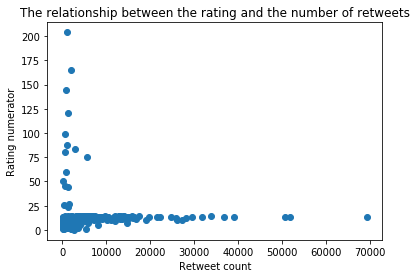

In [16]:
# Because the rating denominator is a constant(10),
# we will only compare the rating numerator with the retweet count and favorite_count.
plt.scatter(df_twitter_archive_master['retweet_count'],
            df_twitter_archive_master['rating_numerator'])
plt.xlabel('Retweet count')
plt.ylabel('Rating numerator')
plt.title('The relationship between the rating and the number of retweets')

Text(0.5,1,'The relationship between the rating and the number of favorites')

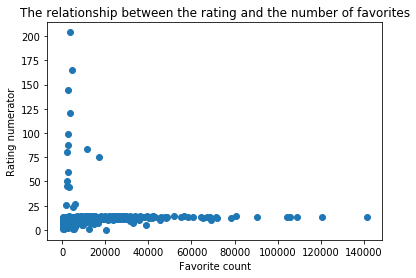

In [17]:
plt.scatter(df_twitter_archive_master['favorite_count'],
            df_twitter_archive_master['rating_numerator'])
plt.xlabel('Favorite count')
plt.ylabel('Rating numerator')
plt.title('The relationship between the rating and the number of favorites')

### Insights:
It is clear that the correlation between the rating and the virality of the tweet is weak.
1. We can see that the rating doesn't have a noticeable effect on the number of retweets.

2. Also, the rating doesn't affect the number of favorites.


### Which kind of dog was rated the most by the account?

### Visualization

In [17]:
# Let's create a list of dog breed names and how many times each one was repeated.
dog_kind_names = df_twitter_archive_master['dog_kind'].value_counts()
dog_kind_names

pupper     220
doggo       70
puppo       27
floofer      3
Name: dog_kind, dtype: int64

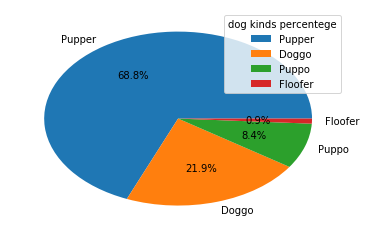

In [20]:
labels = ['Pupper','Doggo', 'Puppo','Floofer']
plt.pie(dog_kind_names, labels=labels, autopct='%1.1f%%')
plt.legend(title='dog kinds percentege')
plt.show()


### Insights:
 It is clear that the breed 'Pupper' is the most frequently rated dog breed by this Twitter account.


